# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [39]:
!pip install palmerpenguins
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from plotnine import *

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [41]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [42]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins['bill_depth_mm']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [44]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, drop = "first", handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
   ("linear_regression", LinearRegression())
   ]
)

In [45]:
lr_pipeline_fitted_1 = lr_pipeline_1.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted_1.predict(X_train)
y_pred_lr = lr_pipeline_fitted_1.predict(X_test)

MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df1 = pd.DataFrame([{'model':'LinearRegression', "Flexibility":7, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])
df1

,model,Flexibility,MSE_train,MSE_test
0,LinearRegression,7,0.563464,0.763445


In [46]:
lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
   ("knn", KNeighborsRegressor(n_neighbors = 5))
   ])

lr_pipeline_fitted_2 = lr_pipeline_2.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted_2.predict(X_train)
y_pred_lr = lr_pipeline_fitted_2.predict(X_test)

MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df2 = pd.DataFrame([{'model':'KNN (n_neighbors = 5)', "Flexibility":5, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])
df2



,model,Flexibility,MSE_train,MSE_test
0,KNN (n_neighbors = 5),5,0.439541,0.79699


In [47]:
lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
   ("knn", KNeighborsRegressor(n_neighbors = 10))
   ])

lr_pipeline_fitted_3 = lr_pipeline_3.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted_3.predict(X_train)
y_pred_lr = lr_pipeline_fitted_3.predict(X_test)

MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df3 = pd.DataFrame([{'model':'KNN (n_neighbors = 10)', "Flexibility":10, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])
df3


,model,Flexibility,MSE_train,MSE_test
0,KNN (n_neighbors = 10),10,0.529054,0.890471


In [48]:
lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
   ("decision_tree", DecisionTreeRegressor(max_depth = 3))
   ])

lr_pipeline_fitted_4 = lr_pipeline_4.fit(X_train, y_train)

y_pred_lr_train = lr_pipeline_fitted_4.predict(X_train)
y_pred_lr = lr_pipeline_fitted_4.predict(X_test)

MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df4 = pd.DataFrame([{'model':'DecisionTreeRegressor (max_depth = 3)', "Flexibility":3, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])
df4


,model,Flexibility,MSE_train,MSE_test
0,DecisionTreeRegressor (max_depth = 3),3,0.542295,0.802711


In [49]:
df_all = pd.concat([df1, df2, df3, df4])
df_all

,model,Flexibility,MSE_train,MSE_test
0,LinearRegression,7,0.563464,0.763445
0,KNN (n_neighbors = 5),5,0.439541,0.796990
0,KNN (n_neighbors = 10),10,0.529054,0.890471
0,DecisionTreeRegressor (max_depth = 3),3,0.542295,0.802711


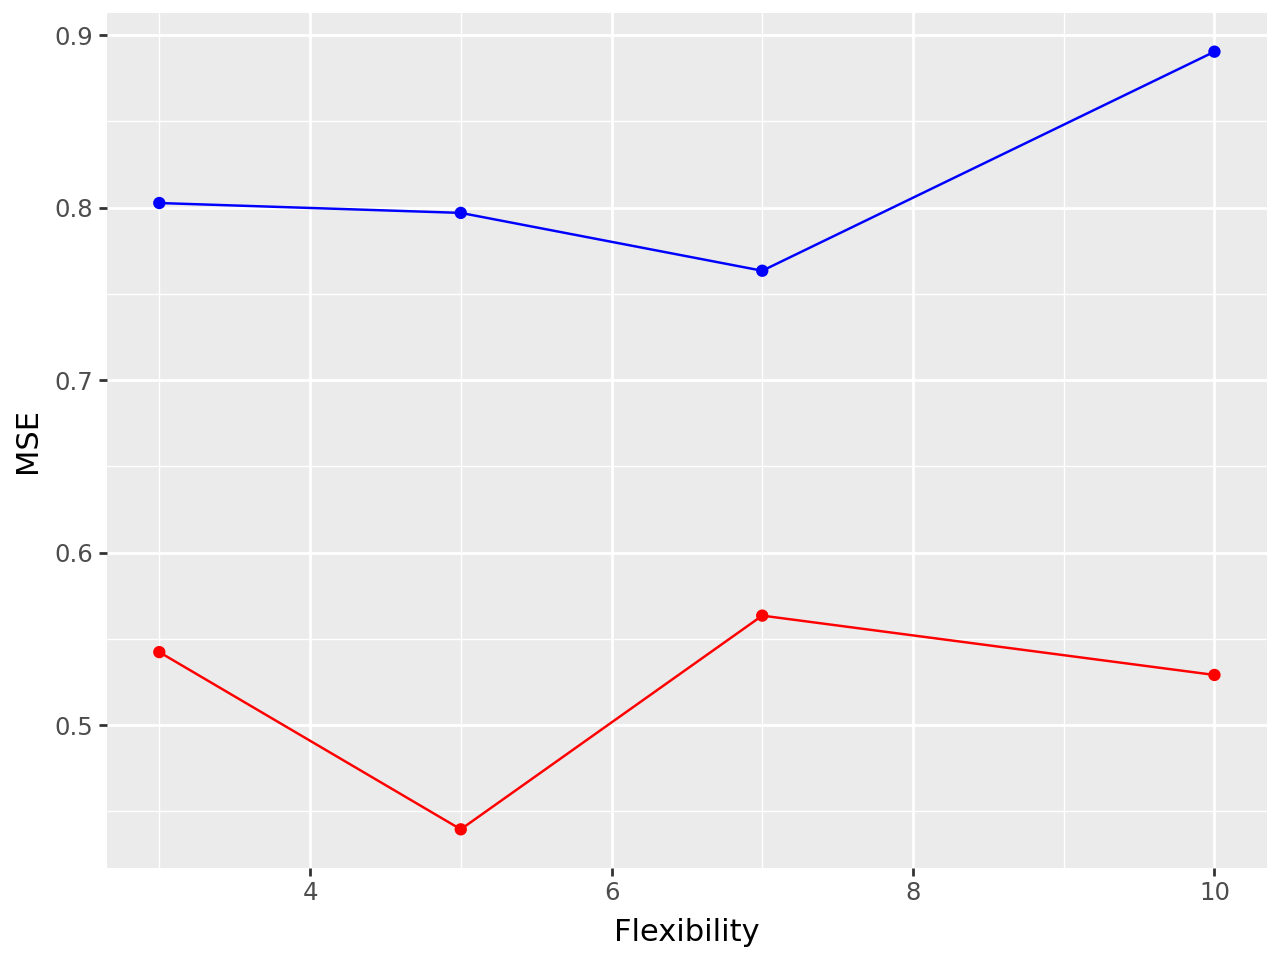

In [51]:
(ggplot(df_all, aes(x = "Flexibility")) +
  geom_line(aes(y = "MSE_train"),color="red") +
  geom_line(aes(y = "MSE_test"),color="blue") +
  geom_point(aes(y = "MSE_train"),color="red") +
  geom_point(aes(y = "MSE_test"),color="blue") +
  labs(x = "Flexibility", y = "MSE", color = "Score Type")
)

Among the four models, the linear regression model using 7 variables, which has the smallest difference between MSE_train and MSE_test, is the best model.